<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Supervised Learning Regression - Linear Regression - Week 1</center></h1>

<center><img src="https://cdn.pixabay.com/photo/2017/04/25/05/14/samurai-2258604_960_720.jpg" width="1080" height="500"></center>

<b><h2><center>Anime Ratings Case Study</center></h2></b>

# Supervised Learning Regression Project: Anime Rating

## Problem Statement

### Business Context

Streamist is a streaming company that streams web series and movies for a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, the number of episodes, duration of an episode, etc.

They are currently focusing on the anime available in their portal, and want to identify the most important factors involved in rating an anime. You as a data scientist at Streamist are tasked with identifying the important factors and building a predictive model to predict the rating on an anime.


### Objective

To analyze the data and build a linear regression model to predict the ratings of anime.


## Key Questions

1. What are the key factors influencing the rating of an anime?
2. Is there a good predictive model for the rating of an anime? What does the performance assessment look like for such a model?


### Data Description

Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

**Data Dictionary**

- title - the title of anime
- description - the synopsis of the plot
- mediaType - format of publication
- eps - number of episodes (movies are considered 1 episode)
- duration - duration of an episode in minutes
- ongoing - whether it is ongoing
- sznOfRelease - the season of release (Winter, Spring, Fall)
- years_running - number of years the anime ran/is running
- studio_primary - primary studio of production
- studios_colab - whether there was a collaboration between studios to produce the anime
- contentWarn - whether anime has a content warning
- watched - number of users that completed it
- watching - number of users that are watching it
- wantWatch - number of users that want to watch it
- dropped - number of users that dropped it before completion
- rating - average user rating
- votes - number of votes that contribute to rating
- tag_Based_on_a_Manga - whether the anime is based on a manga
- tag_Comedy - whether the anime is of Comedy genre
- tag_Action - whether the anime is of Action genre
- tag_Fantasy - whether the anime is of Fantasy genre
- tag_Sci_Fi - whether the anime is of Sci-Fi genre
- tag_Shounen - whether the anime has a tag Shounen
- tag_Original_Work - whether the anime is an original work
- tag_Non_Human_Protagonists - whether the anime has any non-human protagonists
- tag_Drama - whether the anime is of Drama genre
- tag_Adventure - whether the anime is of Adventure genre
- tag_Family_Friendly - whether the anime is family-friendly
- tag_Short_Episodes - whether the anime has short episodes
- tag_School_Life - whether the anime is regarding school life
- tag_Romance - whether the anime is of Romance genre
- tag_Shorts - whether the anime has a tag Shorts
- tag_Slice_of_Life - whether the anime has a tag Slice of Life
- tag_Seinen - whether the anime has a tag Seinen
- tag_Supernatural - whether the anime has a tag Supernatural
- tag_Magic - whether the anime has a tag Magic
- tag_Animal_Protagonists - whether the anime has animal protagonists
- tag_Ecchi - whether the anime has a tag Ecchi
- tag_Mecha - whether the anime has a tag Mecha
- tag_Based_on_a_Light_Novel - whether the anime is based on a light novel
- tag_CG_Animation - whether the anime has a tag CG Animation
- tag_Superpowers - whether the anime has a tag Superpowers
- tag_Others - whether the anime has other tags
- tag_is_missing - whether tag is missing or not

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [2]:
# loading the dataset
df = pd.read_csv("anime_data.csv")

## Data Overview

### Displaying the first five rows of the dataset

In [3]:
# to view first 5 rows of the dataset
df.head(5)

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,1,103707.0,14351,25810,2656,4.702,86547,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,0,58831.0,1453,21733,124,4.663,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,1,45892.0,946,17148,132,4.661,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,0,25134.0,2183,8082,167,4.660,17422,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,1,21308.0,3217,7864,174,4.650,15789,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Checking the shape of the dataset

In [4]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 12101 rows and 44 columns.


In [5]:
# let's create a copy of the data to avoid any changes to original data
data = df.copy()

### Checking the data types of the columns for the dataset

In [6]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

* Dependent variable is the rating of an anime, which if of *float* type.
* `title`, `description`, `mediaType`, `sznOfRelease`, `studio_primary` are of *object* type.
* `ongoing` column is of *bool* type.
* All other columns are numeric in nature.
* There are missing values in the `description` and `duration` columns.

### Checking for duplicate values

In [7]:
# checking for duplicate values in the data
data.duplicated().sum()

0

- There are no duplicate values in the data.

### Checking the statistical summary

In [8]:
# Let's look at the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,12101.0,13.393356,57.925097,1.000,1.000,2.000,12.000,2527.000
duration,7465.0,24.230141,31.468171,1.000,4.000,8.000,30.000,163.000
years_running,12101.0,0.283200,1.152234,0.000,0.000,0.000,0.000,51.000
studios_colab,12101.0,0.051649,0.221326,0.000,0.000,0.000,0.000,1.000
contentWarn,12101.0,0.115362,0.319472,0.000,0.000,0.000,0.000,1.000
watched,12101.0,2862.605694,7724.347024,0.000,55.000,341.000,2026.000,161567.000
watching,12101.0,256.334435,1380.840902,0.000,2.000,14.000,100.000,74537.000
wantWatch,12101.0,1203.681431,2294.327380,0.000,49.000,296.000,1275.000,28541.000
dropped,12101.0,151.568383,493.931710,0.000,3.000,12.000,65.000,19481.000
rating,12101.0,2.949037,0.827385,0.844,2.304,2.965,3.616,4.702


* We can see that the anime ratings vary between 0.844 and 4.702, which suggests that the anime were rated on a scale of 0-5.

* 50% of the anime in the data have a runtime less than or equal to 8 minutes.

* Some anime even have a runtime of 1 minute.
    - This seems strange at first, but a Google search can reveal that there are indeed such anime.


* At least 75% of the anime have run for less than a year.
    - This may be because the listed anime has few episodes only.


* At least 75% of the anime have no content warnings.

* The number of views for the anime in the data has a very wide range (0 to more than 160,000).

### Checking the unique values in each of the columns

In [9]:
# filtering non-numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['title', 'description', 'mediaType', 'ongoing', 'sznOfRelease',
       'studio_primary'],
      dtype='object')

In [10]:
# we will skip the title and description columns as they will have a lot of unique values
cat_col = ["mediaType", "ongoing", "sznOfRelease", "studio_primary"]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
is_missing       63
Name: mediaType, dtype: int64
--------------------------------------------------
False    11986
True       115
Name: ongoing, dtype: int64
--------------------------------------------------
is_missing    8554
Spring        1135
Fall          1011
Winter         717
Summer         684
Name: sznOfRelease, dtype: int64
--------------------------------------------------
Others                  4340
is_missing              3208
Toei Animation           636
Sunrise                  430
J.C. Staff               341
MADHOUSE                 337
TMS Entertainment        317
Production I.G           271
Studio Deen              260
Studio Pierrot           221
OLM                      210
A-1 Pictures             194
AIC                      167
Shin-Ei Animation        164
Nippon Animation         145
Tatsunoko Produc

* Most of the anime in the data are either TV series or movies.
* Most of the anime in the data are not ongoing.
* The season of release is missing for most of the anime in the data.
* *Toei Animation* and *Sunrise* are the top two studios (excluding other studios and missing studios).

### Checking the missing values

In [11]:
# checking for missing values in the data
data.isnull().sum()

title                            0
description                   4468
mediaType                        0
eps                              0
duration                      4636
ongoing                          0
sznOfRelease                     0
years_running                    0
studio_primary                   0
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes  

* `duration` column has 4636 missing values, and `description` column has 4468 missing values.
* No other column has missing values.

**We will drop the missing values in the dataset**

In [12]:
data.dropna(inplace=True)
data.shape

(3712, 44)

**We will drop the `title` and `description` columns before moving forward as they have a lot of text in them.**

In [13]:
data.drop(["title", "description"], axis=1, inplace=True)

## <a name='link2'>Exploratory Data Analysis (EDA)</a>


In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Rating

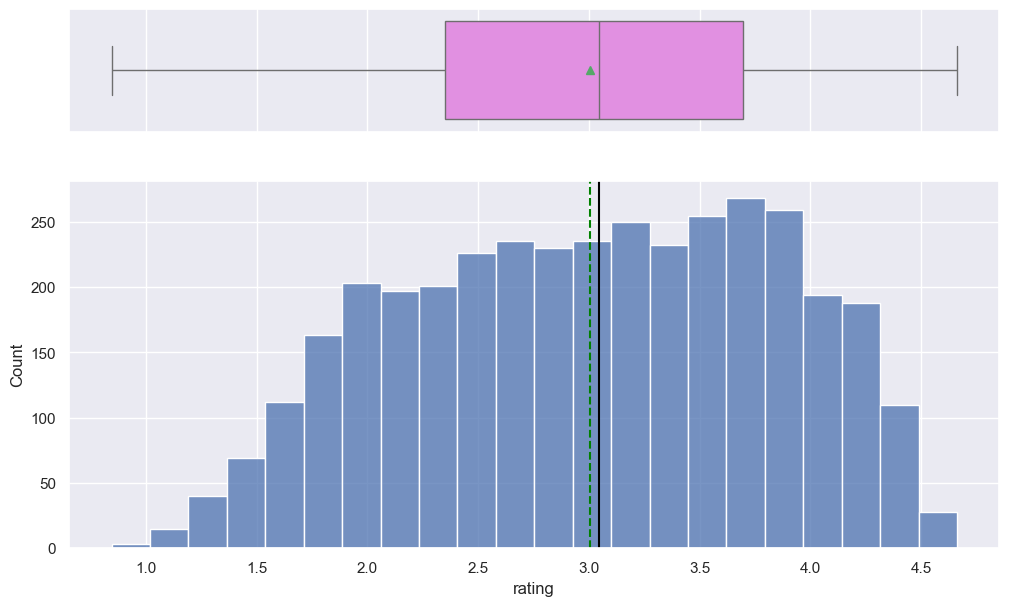

In [17]:
histogram_boxplot(data, "rating")

* The anime ratings are close to normally distributed.

### eps

/var/folders/l3/yk029flj0rg6t6x38gd6p2tr0000gn/T/ipykernel_44475/3188613800.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


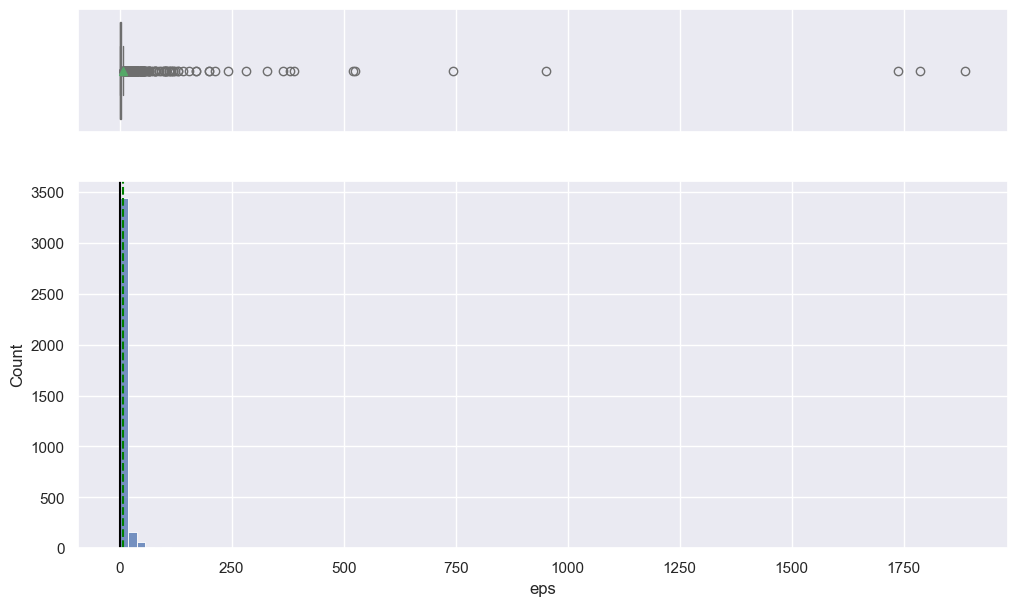

In [18]:
histogram_boxplot(data, "eps", bins=100)

* The distribution is heavily right-skewed, as there are many anime movies in the data, and they are considered to be of only one episode (as per data description).

### duration

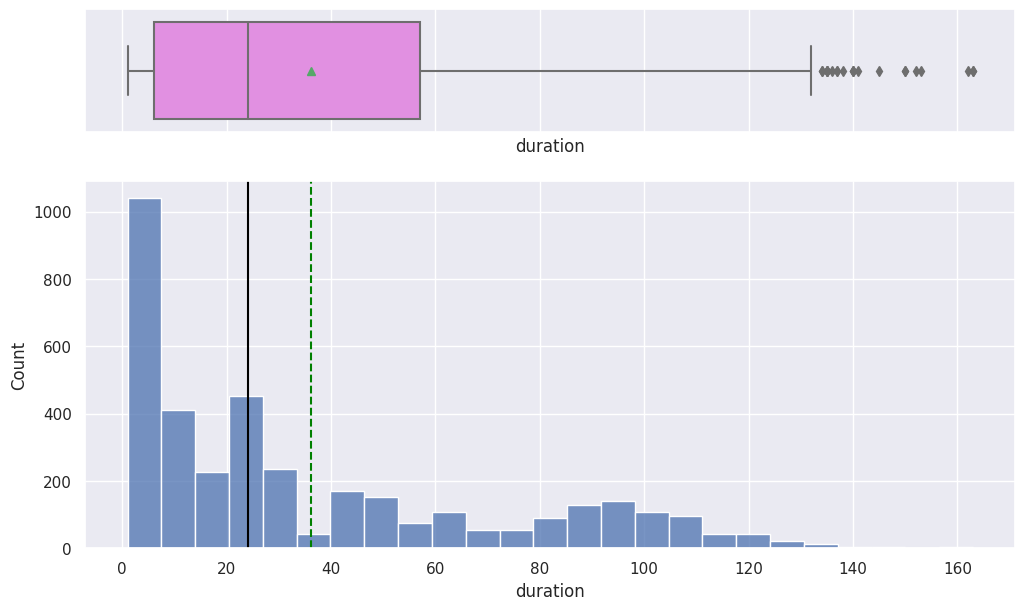

In [23]:
histogram_boxplot(data, "duration")

* The distribution is right-skewed with a median runtime of less than 10 minutes.

### mediaType

/var/folders/l3/yk029flj0rg6t6x38gd6p2tr0000gn/T/ipykernel_44475/2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


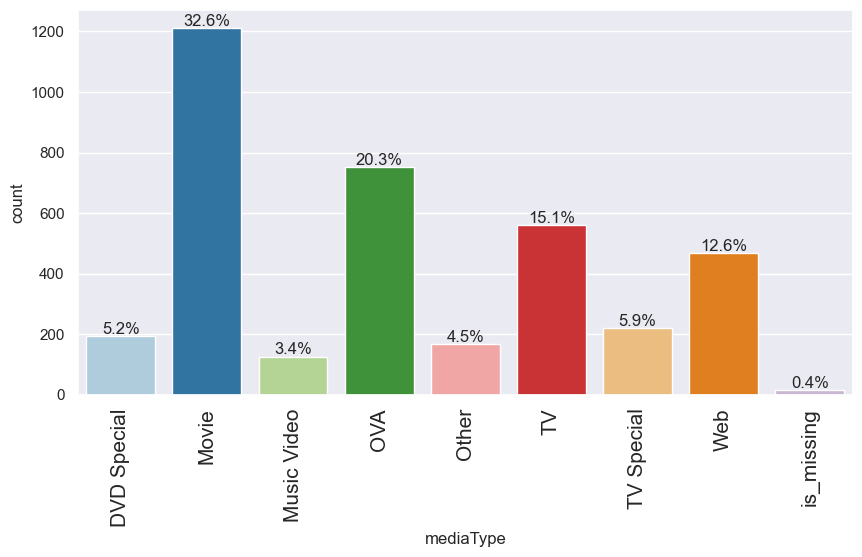

In [19]:
labeled_barplot(data, "mediaType", perc=True)

* Distribution of the media types has changed a lot after dropping the rows with missing values.
* Most of the anime now are movies or music videos.

### studio_primary

/var/folders/l3/yk029flj0rg6t6x38gd6p2tr0000gn/T/ipykernel_44475/2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


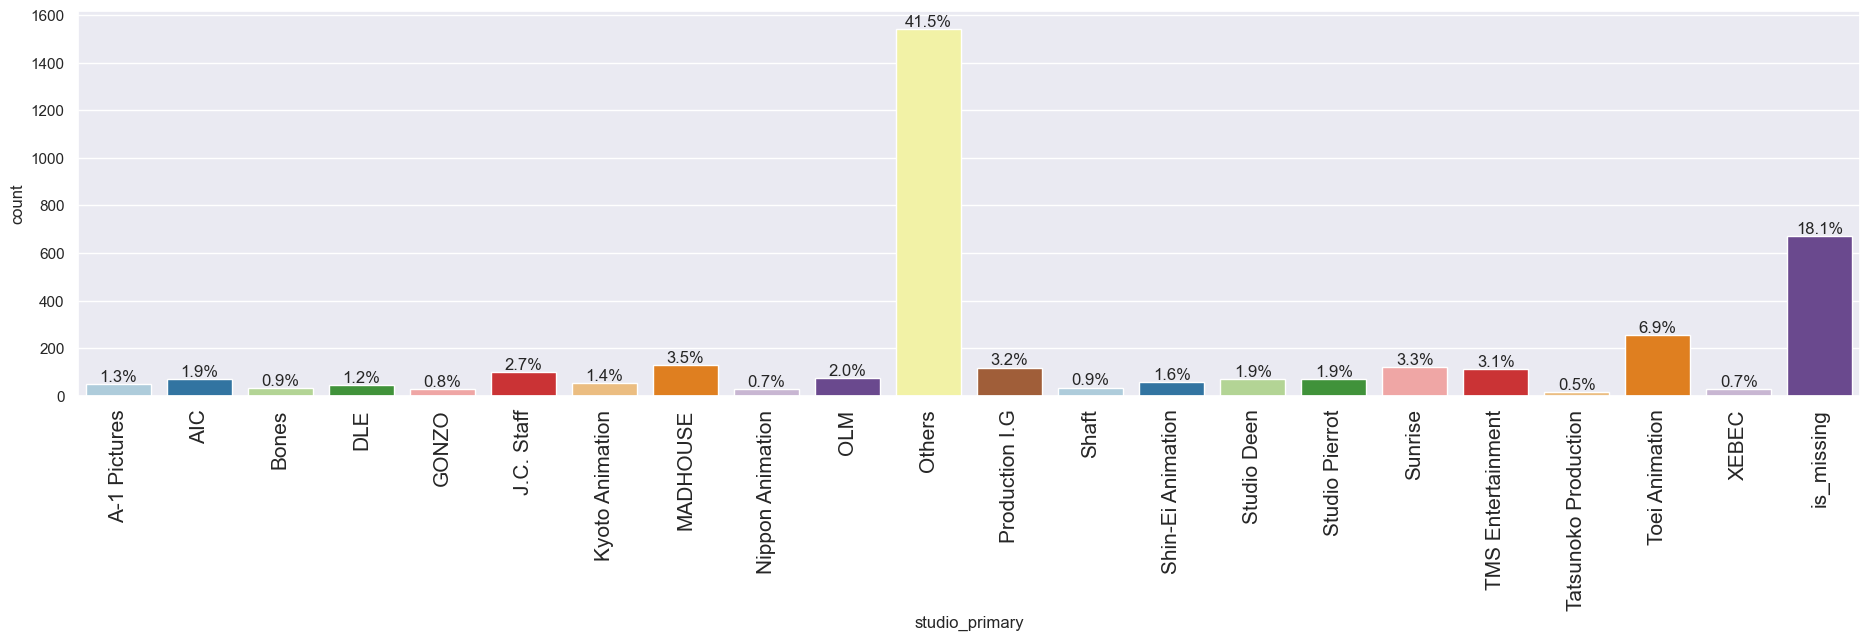

In [20]:
labeled_barplot(data, "studio_primary", perc=True)

* *Toei Animation* is the most common studio among the available studio names.

### `sznOfRelease` vs `rating`

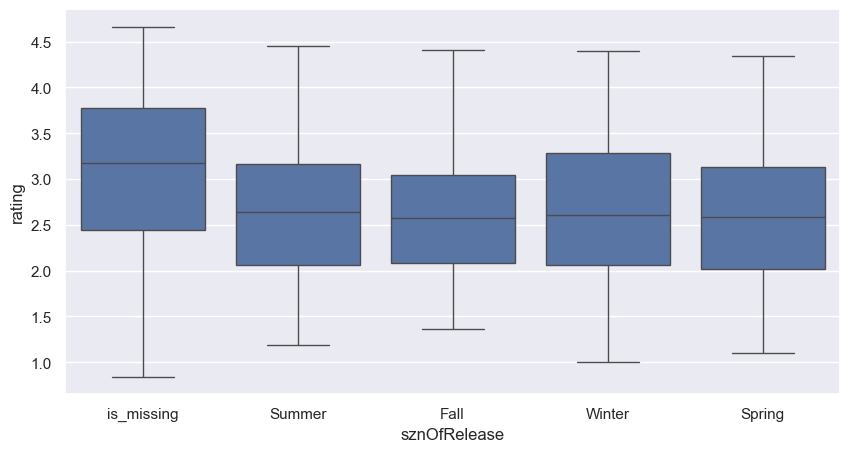

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="sznOfRelease", y="rating", data=data)
plt.show()

* Anime ratings have a similar distribution across all the seasons of release.

### <a id='link1'>Summary of EDA</a>

**Data Description:**

- The target variable (`rating`) is of *float* type.
- `title`, `description`, `mediaType`, `sznOfRelease`, and `studio_primary` are of *object* type.
- `ongoing` column is of *bool* type.
- All other columns are numeric in nature.
- The `title` and `description` columns are dropped for modeling as they are highly textual in nature.
- There are no duplicate values in the data.
- There are missing values in the data. The rows with missing data have been dropped.


**Observations from EDA:**

- `rating`: The anime ratings are close to normally distributed, with a mean rating of 2.74. The rating increases with an increase in the number of people who have watched or want to watch the anime.
- `eps`: The distribution is heavily right-skewed as there are many anime movies in the data (at least 50%), and they are considered to be of only one episode as per data description. The number of episodes increases as the anime runs for more years.
- `duration`: The distribution is right-skewed with a median anime runtime of less than 10 minutes. With the increase in rating, the duration increases.
- `years_running`: The distribution is heavily right-skewed, and at least 75% of the anime have run for less than 1 year.
- `watched`: The distribution is heavily right-skewed, and most of the anime have less than 500 viewers. This attribute is highly correlated with the `wantWatch` and `votes` attributes.
- `watching`: The distribution is heavily right-skewed and highly correlated with the `dropped` attribute.
- `wantWatch`: The distribution is heavily right-skewed with a median value of 132 potential watchers.
- `dropped`: The distribution is heavily right-skewed with a drop of 25 viewers on average.
- `votes`: The distribution is heavily right-skewed, and few shows have more than 5000 votes.
- `mediaType`: 23% of the anime are published for TV, 17% as music videos, and 14% as web series. Anime available as TV series, web series, or music videos have a lower rating in general
- `ongoing`: Less than 1% of the anime in the data are ongoing.
- `sznOfRelease`: The season of release is missing for nearly 90% of the anime in the data, and is spread out almost evenly across all seasons when available. Anime ratings have a similar distribution across all the seasons of release.
- `studio_primary`: Nearly 40% of the anime in the data are produced by studios not listed in the data. Toei Animation is the most common studio among the available studio names. In general, the ratings are low for anime produced by DLE studios and studios other than the ones listed in the data.
- `studios_colab`: More than 95% of the anime in the data do not involve collaboration between studios.
- `contentWarn`: Less than 10% of the anime in the data have an associated content warning.
- `tag_<tag/genre>`: There are 1747 anime that are based on manga, 1920 of the Comedy genre, 1238 of the Action genre, 1079 anime of the Romance genre, and more.

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

## Model Building

### Define independent and dependent variables

In [22]:
X = data.drop(["rating"], axis=1)
y = data["rating"]

### Creating dummy variables

In [23]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,eps,duration,ongoing,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web,mediaType_is_missing,sznOfRelease_Spring,sznOfRelease_Summer,sznOfRelease_Winter,sznOfRelease_is_missing,studio_primary_AIC,studio_primary_Bones,studio_primary_DLE,studio_primary_GONZO,studio_primary_J.C. Staff,studio_primary_Kyoto Animation,studio_primary_MADHOUSE,studio_primary_Nippon Animation,studio_primary_OLM,studio_primary_Others,studio_primary_Production I.G,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC,studio_primary_is_missing
1,1,107.0,False,0,0,0,58831.0,1453,21733,124,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,130.0,False,0,0,1,45892.0,946,17148,132,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,111.0,False,0,0,0,8454.0,280,6624,150,6254,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
27,1,125.0,False,0,0,0,115949.0,589,12388,161,82752,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31,1,117.0,False,0,0,0,35896.0,538,15651,130,26465,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [24]:
X.shape

(3712, 71)

### Split the data into train and test

In [25]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2598
Number of rows in test data = 1114


### Fitting a linear model

In [27]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

### Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function that will print out all the above metrics in one go.

In [28]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [29]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.567087,0.455491,0.534514,0.52143,17.654509


In [30]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.592959,0.476744,0.492206,0.457606,18.213034


**Observations**

- The train and test $R^2$ are 0.522 and 0.516, indicating that the model explains 52.2% and 51.6% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict anime ratings within a mean error of 0.46

- MAPE of 19.4 on the test data means that we are able to predict within 19.4% of the anime rating.

- However, the overall performance is not so great.

### Conclusions
- We have been able to build a predictive model that can be used by Streamist to predict the rating of an anime with an $R^2$ of 0.52 on the training set.


- Streamist can use this model to predict the anime ratings within a mean error of 0.46


- From the analysis, we found that the duration of each episode, and whether or not an anime is ongoing are some of the factors which tend to increase the rating of an anime. And factors like content warnings tend to decrease the rating of an anime.


- We can also explore improving the linear model by applying non-linear transformations to some of the attributes. This might help us better identify the patterns in the data to predict the anime ratings more accurately.

## Additional: Forward Feature Selection using *SequentialFeatureSelector*


We will see how to select a subset of important features with forward feature selection using *SequentialFeatureSelector*.

**Why should we do feature selection?**

- Reduces dimensionality
- Discards deceptive features (Deceptive features appear to aid learning on the training set, but impair generalization)
- Speeds training/testing


**How does forward feature selection work?**

* It starts with an empty model and adds variables one by one.
* In each forward step, you add the one variable that gives the highest improvement to your model.


We'll use forward feature selection on all the variables

In [31]:
# please uncomment and run the next line if mlxtend library is not previously installed
#!pip install mlxtend

SyntaxError: invalid syntax (3564600452.py, line 2)

In [32]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  56 out of  71 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    1.9s finished

[2024-12-16 18:48:38] Features: 1/71 -- score: 0.2569464425015188[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished

[2024-12-16 18:48:39] Features: 2/71 -- score: 0.34901268492854703[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.2s finished

[2024-12-16 18:48:39] Features: 3/71 -- score: 0.3781512849224713[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=

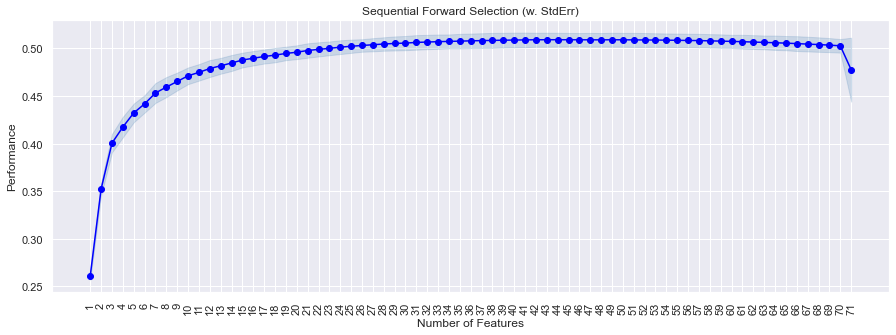

<IPython.core.display.Javascript object>

In [ ]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

- We can see that performance increases till the 30th feature and then slowly becomes constant, and then drops sharply after the 70th feature is added.
- The decision to choose the *k_features* now depends on the adjusted $R^2$ vs the complexity of the model.
    - With 30 features, we are getting an adjusted $R^2$ of 0.506
    - With 48 features, we are getting an adjusted $R^2$ of 0.509.
    - With 71 features, we are getting an adjusted $R^2$ of 0.477.
- The increase in adjusted $R^2$ is not very significant as we are getting the same values with a less complex model.
- So we'll use 30 features only to build our model, but you can experiment by taking a different number.
- Number of features chosen will also depend on the business context and use case of the model.

In [33]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=30,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  56 out of  71 | elapsed:    1.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    1.7s finished

[2024-12-16 18:54:56] Features: 1/30 -- score: 0.2569464425015188[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished

[2024-12-16 18:54:56] Features: 2/30 -- score: 0.34901268492854703[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.2s finished

[2024-12-16 18:54:56] Features: 3/30 -- score: 0.3781512849224713[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=

In [34]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 5, 8, 9, 11, 12, 14, 16, 19, 22, 25, 26, 28, 31, 33, 38, 40, 41, 42, 43, 44, 46, 51, 52, 60, 65, 66, 70]


In [35]:
# let us look at the names of the important features
x_train.columns[feat_cols]

Index(['duration', 'ongoing', 'years_running', 'contentWarn', 'wantWatch',
       'dropped', 'tag_Based_on_a_Manga', 'tag_Comedy', 'tag_Fantasy',
       'tag_Shounen', 'tag_Drama', 'tag_Short_Episodes', 'tag_Shorts',
       'tag_Slice_of_Life', 'tag_Supernatural', 'tag_Ecchi',
       'tag_Based_on_a_Light_Novel', 'mediaType_Movie', 'mediaType_OVA',
       'mediaType_Other', 'mediaType_TV', 'mediaType_TV Special',
       'mediaType_Web', 'sznOfRelease_Spring', 'studio_primary_Bones',
       'studio_primary_DLE', 'studio_primary_Production I.G',
       'studio_primary_Sunrise', 'studio_primary_TMS Entertainment',
       'studio_primary_is_missing'],
      dtype='object')

**Now we will fit an sklearn model using these features only.**

In [36]:
x_train_final = x_train[x_train.columns[feat_cols]]

In [37]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

In [38]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)



LinearRegression()

In [39]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.574093,0.459393,0.522941,0.517366,17.841131


In [40]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.604961,0.487066,0.471442,0.4568,18.566453


- The performance looks slightly worse than the previous model.
- Let's compare the two models we built.

In [41]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.567087,0.574093
MAE,0.455491,0.459393
R-squared,0.534514,0.522941
Adj. R-squared,0.521430,0.517366
MAPE,17.654509,17.841131


In [42]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.592959,0.604961
MAE,0.476744,0.487066
R-squared,0.492206,0.471442
Adj. R-squared,0.457606,0.456800
MAPE,18.213034,18.566453


* The new model (*lin_reg_model2*) uses less than half the number of features as the previous model (*lin_reg_model*).
* The performance of the new model, however, is close to our previous model.
* Depending upon time sensitivity and storage restrictions, we can choose between the models.
* **We will be moving forward with *lin_reg_model* as it shows better performance.**

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### years_running

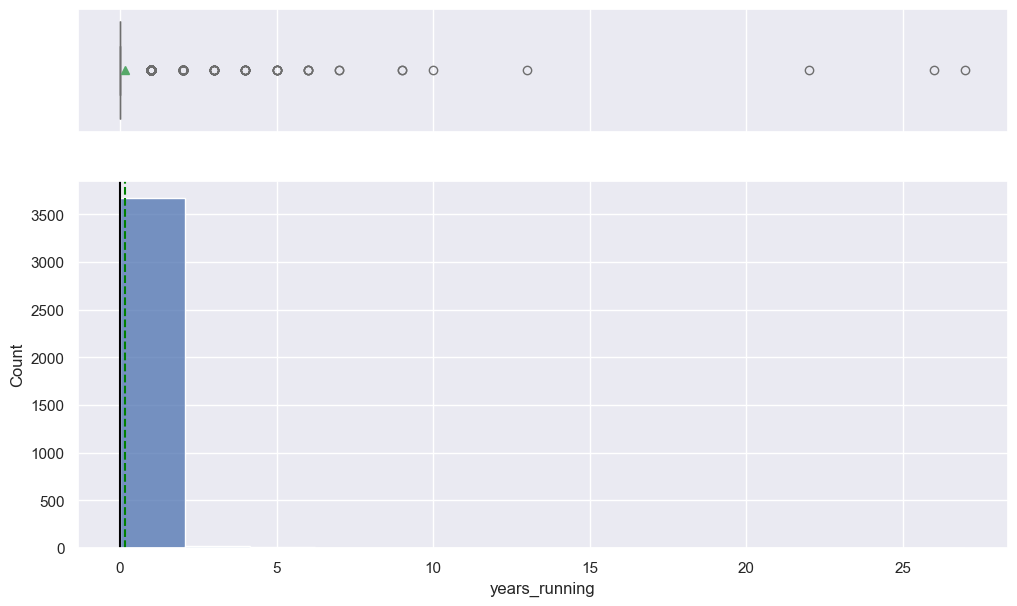

In [43]:
histogram_boxplot(data, "years_running")

* The distribution is heavily right-skewed, and most of the anime have run for less than 1 year.

#### watched

<ipython-input-19-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


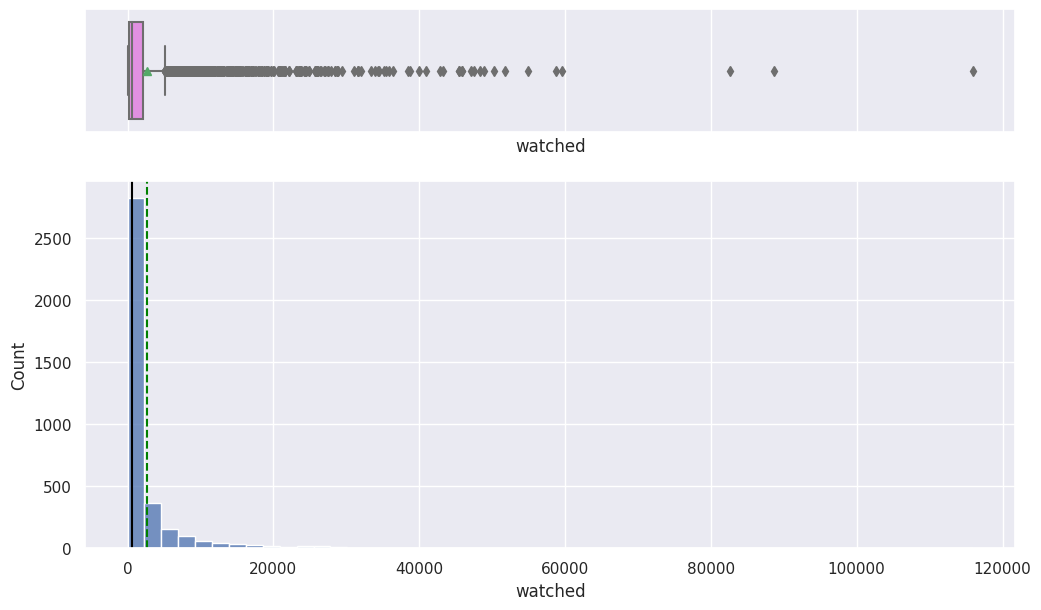

In [28]:
histogram_boxplot(data, "watched", bins=50)

* The distribution is heavily right-skewed, and most of the anime having less than 500 viewers.

#### watching

<ipython-input-19-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


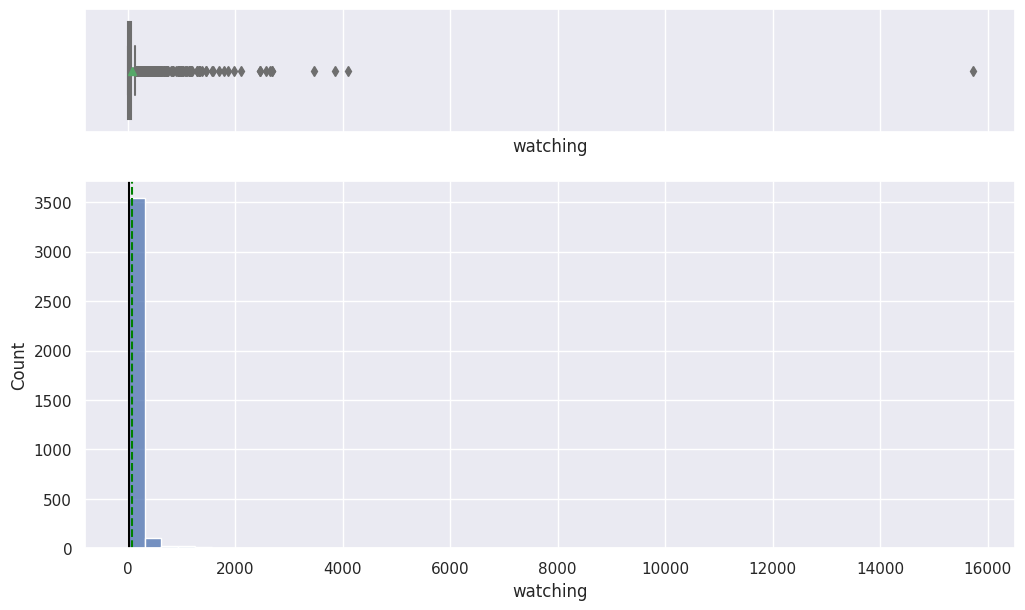

In [29]:
histogram_boxplot(data, "watching", bins=50)

* The distribution is heavily right-skewed.

#### wantWatch

<ipython-input-19-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


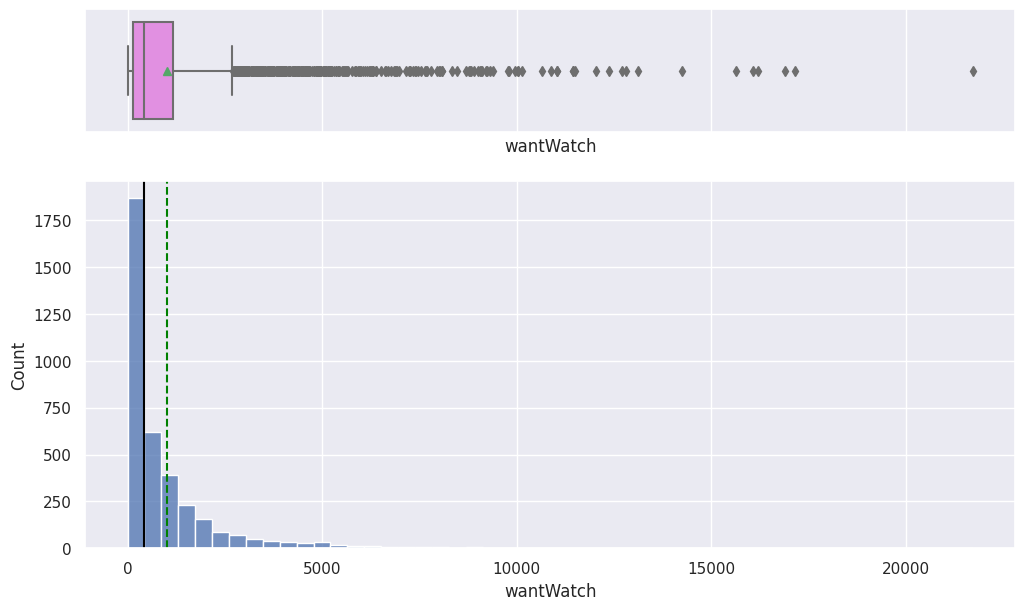

In [30]:
histogram_boxplot(data, "wantWatch", bins=50)

* The distribution is heavily right-skewed.

#### dropped

<ipython-input-19-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


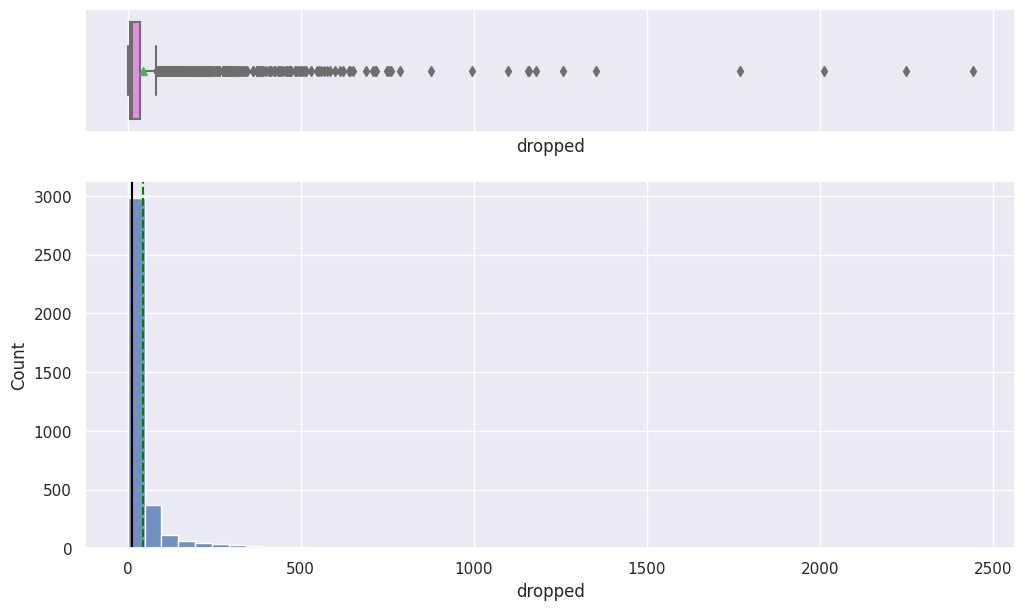

In [31]:
histogram_boxplot(data, "dropped", bins=50)

* The distribution is heavily right-skewed.

#### votes

<ipython-input-19-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


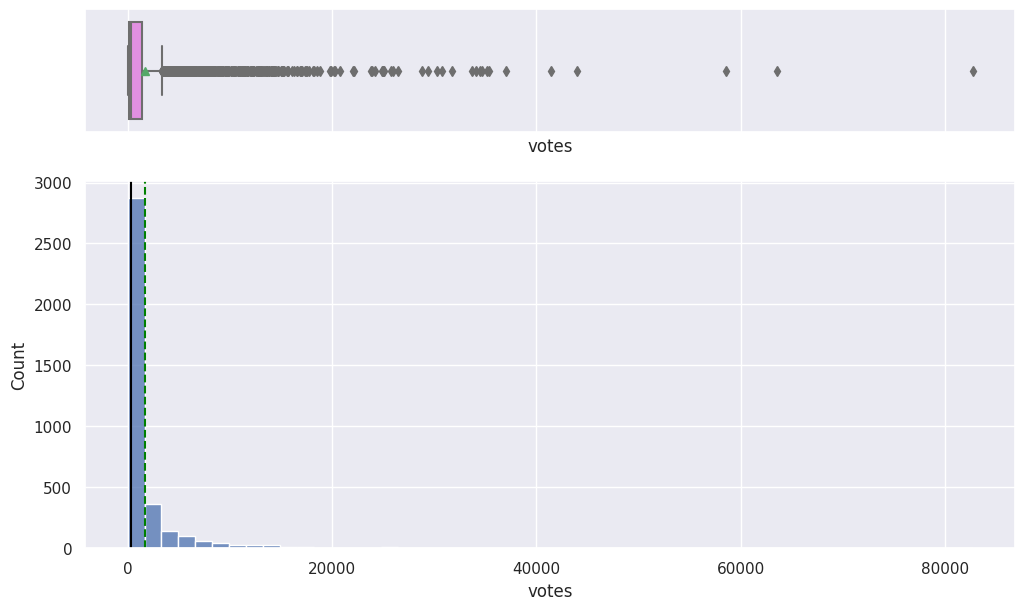

In [32]:
histogram_boxplot(data, "votes", bins=50)

* The distribution is heavily right-skewed, and few shows have more than 5000 votes.

#### `mediaType` vs `rating`

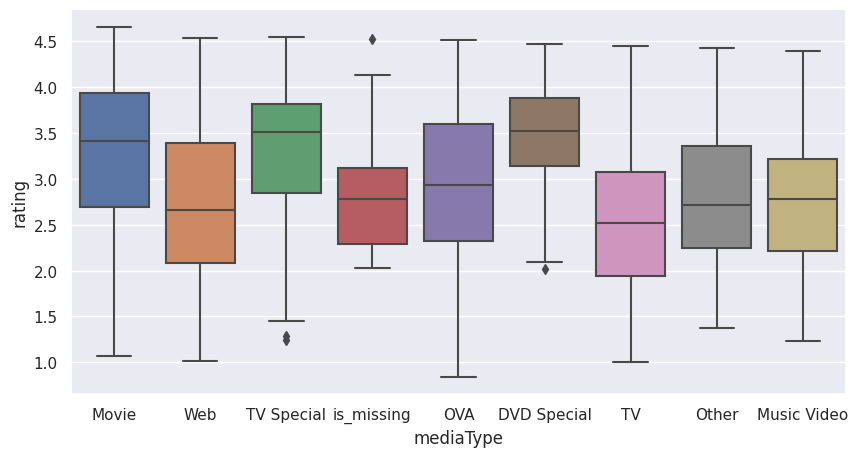

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="mediaType", y="rating", data=data)
plt.show()

* Anime available as TV series, web series, or music videos have a lower rating in general.

* `watched` and `wantWatch` columns are highly correlated.
* `watched` and `votes` columns are very highly correlated.
* `wantWatch` and `votes` columns are highly correlated.

### Bivariate Analysis

#### ongoing

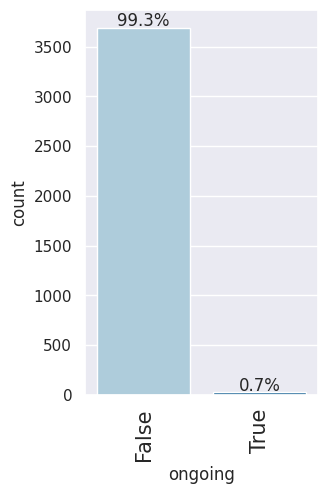

In [37]:
labeled_barplot(data, "ongoing", perc=True)

* Very few anime in the data are ongoing.

#### sznOfRelease

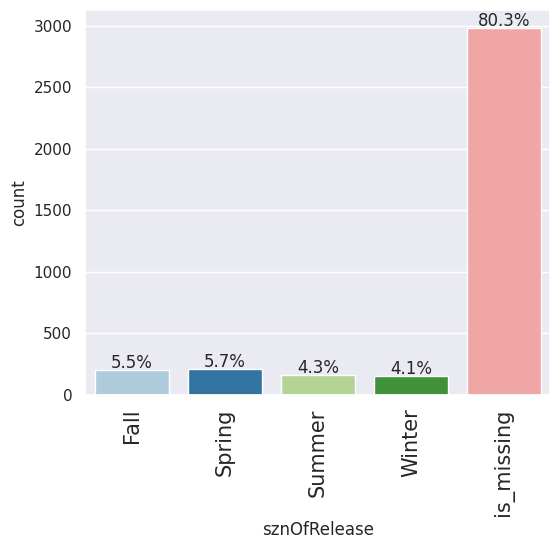

In [38]:
labeled_barplot(data, "sznOfRelease", perc=True)

* The season of release of anime is spread out across all seasons when the value is available.

#### studios_colab

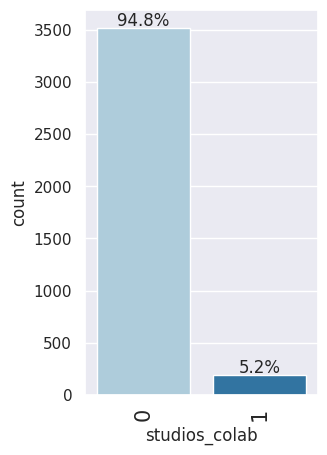

In [39]:
labeled_barplot(data, "studios_colab", perc=True)

- More than 95% of the anime in the data do not involve a collaboration between studios.

#### contentWarn

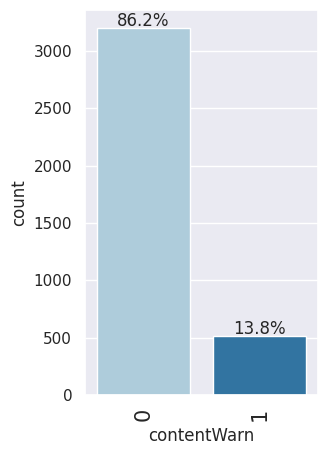

In [40]:
labeled_barplot(data, "contentWarn", perc=True)

- ~9% of the anime in the data have an associated content warning.

#### Creating a list of tags

In [41]:
# creating a list of tag columns
tag_cols = [item for item in data.columns if "tag" in item]

# printing the number of occurrences of each unique value in each categorical column
for column in tag_cols:
    print(data[column].value_counts())
    print("-" * 50)

0    2495
1    1217
Name: tag_Based_on_a_Manga, dtype: int64
--------------------------------------------------
0    2635
1    1077
Name: tag_Comedy, dtype: int64
--------------------------------------------------
0    2767
1     945
Name: tag_Action, dtype: int64
--------------------------------------------------
0    2992
1     720
Name: tag_Fantasy, dtype: int64
--------------------------------------------------
0    3025
1     687
Name: tag_Sci_Fi, dtype: int64
--------------------------------------------------
0    3131
1     581
Name: tag_Shounen, dtype: int64
--------------------------------------------------
0    3065
1     647
Name: tag_Original_Work, dtype: int64
--------------------------------------------------
0    3195
1     517
Name: tag_Non_Human_Protagonists, dtype: int64
--------------------------------------------------
0    3279
1     433
Name: tag_Drama, dtype: int64
--------------------------------------------------
0    3312
1     400
Name: tag_Adventure, dtype: 

* There are 1747 anime that are based on manga.
* There are 1920 anime of the Comedy genre.
* There are 1079 anime of the Romance genre.

**We will not consider the *tag* columns for correlation check as they have only 0 or 1 values.**

In [42]:
# creating a list of non-tag columns
corr_cols = [item for item in data.columns if "tag" not in item]
print(corr_cols)

['mediaType', 'eps', 'duration', 'ongoing', 'sznOfRelease', 'years_running', 'studio_primary', 'studios_colab', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes']


#### Correlation

In [46]:
# creating a list of non-tag columns
corr_cols = [item for item in data.columns if "tag" not in item]
print(corr_cols)

['mediaType', 'eps', 'duration', 'ongoing', 'sznOfRelease', 'years_running', 'studio_primary', 'studios_colab', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes']


<ipython-input-43-6901a95a747f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"


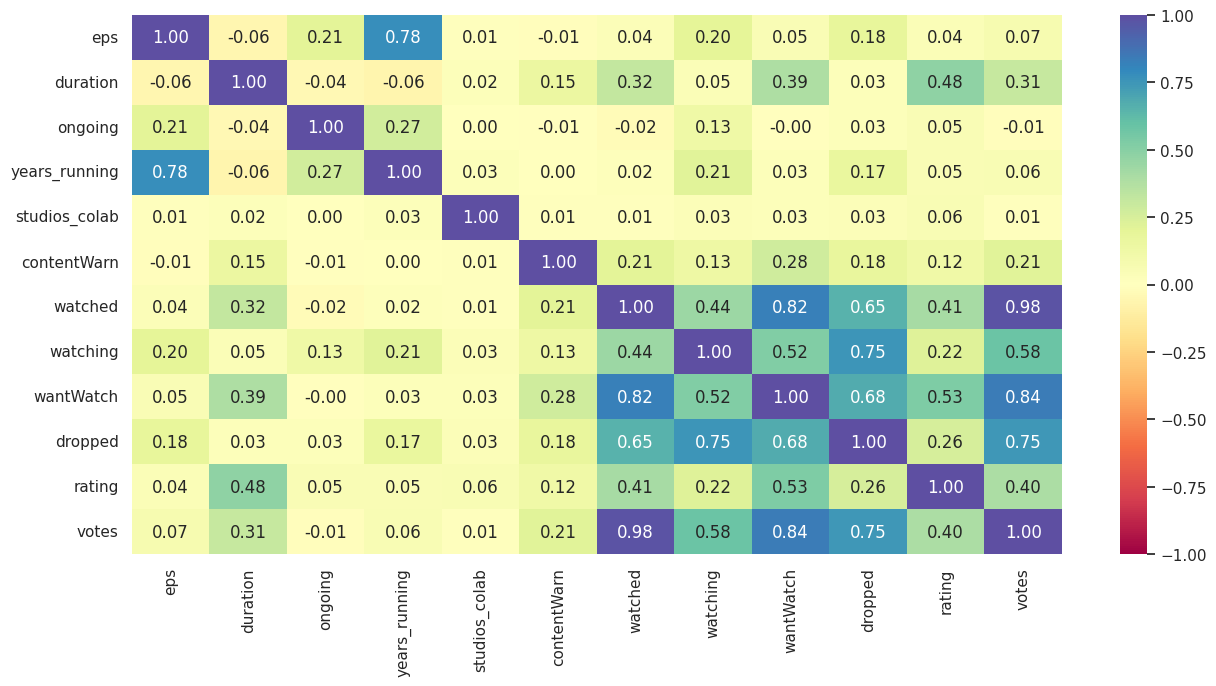

In [43]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Checking the relation of different variables with rating

**Note** - Double click on the below plot to zoom the image. Or you can open the below plot in a new tab for better visibilty

<Figure size 2000x500 with 0 Axes>

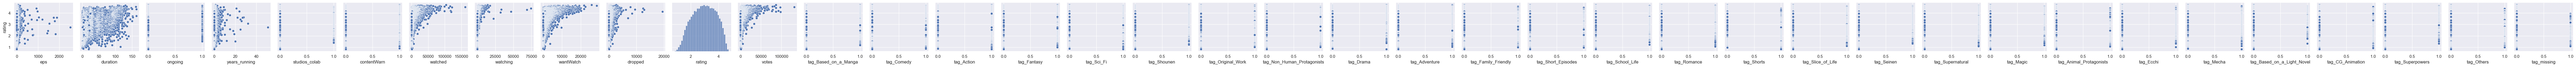

In [44]:
plt.figure(figsize=(20, 5))
sns.pairplot(df, y_vars="rating")
plt.show()

* Duration, ongoing, watched columns tend to show an increasing trend which means if there is an increase in the respective column there would be an increase in the rating. 
* Content warning tend to show the decreasing trend. 


#### `studio_primary` vs `rating`

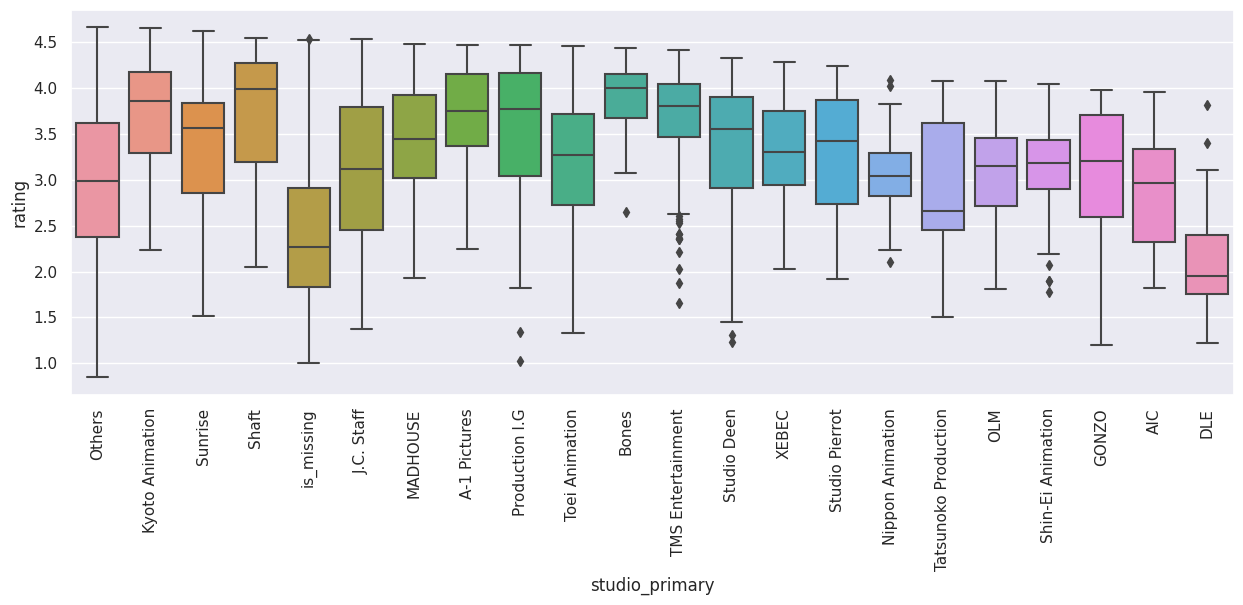

In [45]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="studio_primary", y="rating", data=data)
plt.xticks(rotation=90)
plt.show()

* In general, the ratings are low for anime produced by *DLE* studios.
* Ratings are also low, in general, for anime produced by studios other than the ones in the data.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.